In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action = 'ignore')

In [2]:
df = pd.read_csv(r'C:\Users\vinem\OneDrive\Рабочий стол\Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
#Annual Income-Annual Income of the customee
#Spending Score-Score assigned by the mall based on customer behavior and spending nature

We won't need the id, so we'll delete it. Then I'll do a little analysis. And at the end, I'll replace the gender with numbers.

In [4]:
df.drop('CustomerID', axis = 1, inplace = True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [6]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [7]:
df = df.rename(columns = {'Annual Income (k$)': 'Money', 'Spending Score (1-100)' : 'Spending'})

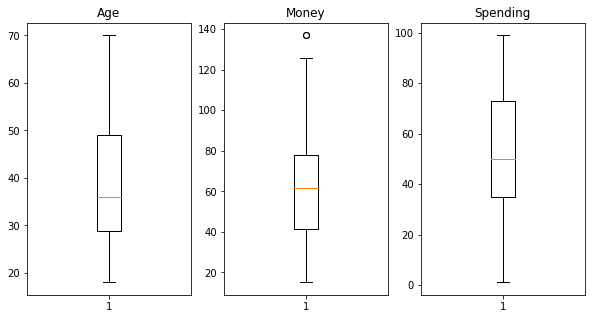

In [8]:
fig, ax = plt.subplots(1, 3, figsize = (10, 5))

ax[0].boxplot(df['Age'])
ax[0].set_title('Age')
ax[1].boxplot(df['Money'])
ax[1].set_title('Money')
ax[2].boxplot(df['Spending'])
ax[2].set_title('Spending')

plt.show()

In [9]:
df.isnull().sum()

Gender      0
Age         0
Money       0
Spending    0
dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender_1'] = le.fit_transform(df['Gender'])

In [11]:
df

,Gender,Age,Money,Spending,Gender_1
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,0
3,Female,23,16,77,0
4,Female,31,17,40,0
...,...,...,...,...,...
195,Female,35,120,79,0
196,Female,45,126,28,0
197,Male,32,126,74,1
198,Male,32,137,18,1


In [12]:
df.drop('Gender', axis = 1, inplace = True)

In [13]:
x = df.iloc[:, [2,3]].values

In [14]:
from sklearn.cluster import KMeans
elbow = []

for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    km.fit(x)
    elbow.append(km.inertia_)

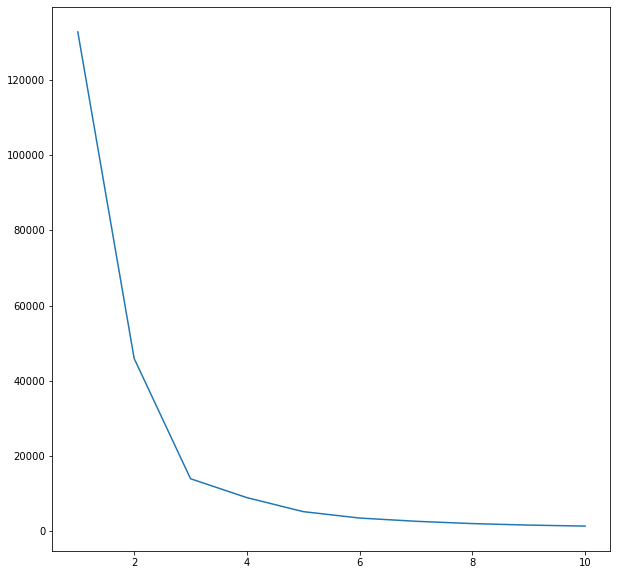

In [15]:
plt.figure(figsize = (10, 10))
plt.plot(range(1, 11), elbow)
plt.show()

In [16]:
k_means = KMeans(n_clusters = 3).fit(x)
y_kmeans = k_means.predict(x)
y_kmeans

array([0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2,
       1, 2, 1, 2, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [17]:
centres = k_means.cluster_centers_
centres

array([[48.35789474,  0.41052632],
       [14.59574468,  0.5106383 ],
       [82.06896552,  0.43103448]])

<AxesSubplot:xlabel='Money', ylabel='Spending'>

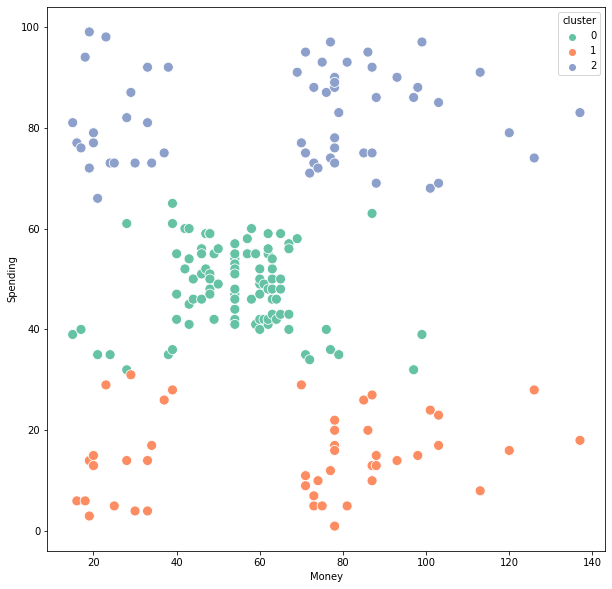

In [18]:
import numpy as np
df['cluster'] = y_kmeans
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

sns.scatterplot(data=df, x='Money', y='Spending', hue='cluster', palette=sns.color_palette('Set2', 3), ax=ax, s=100)